In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tqdm

(600, 400, 3) (240000, 3)


100%|██████████| 29/29 [00:18<00:00,  1.60it/s]


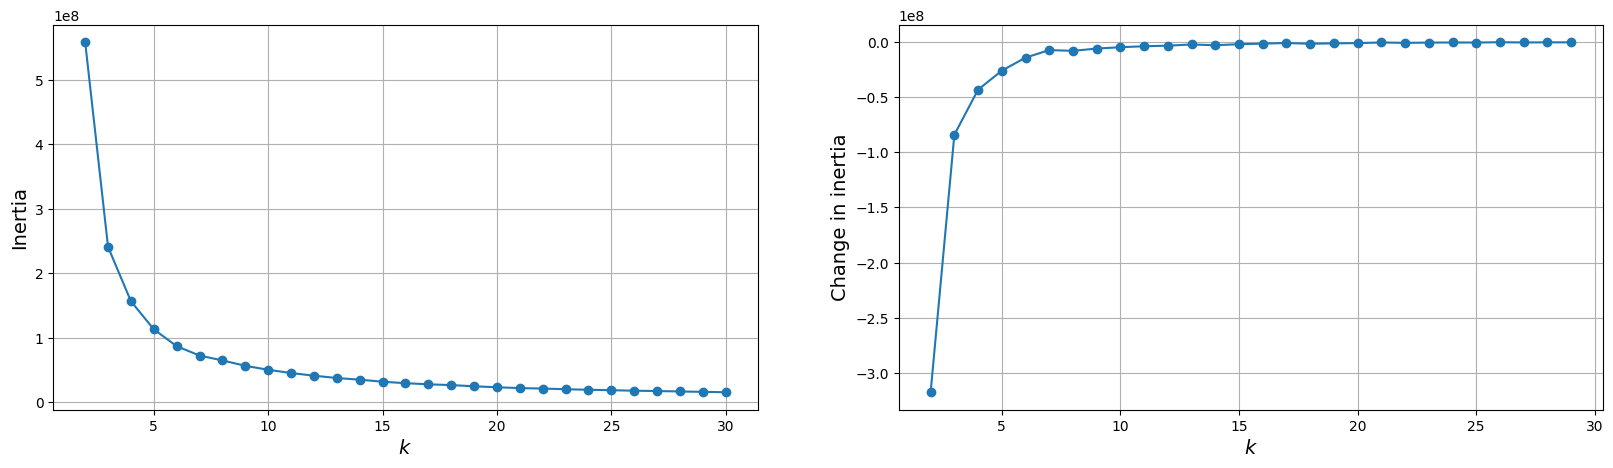

In [2]:
# Photo by Ferdinand Studio, downloaded from Pixels.
file_path = "imagens/todas_imagens/a_003.jpeg"
img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def resize(image, width = None, height = None, scale = 1):
    # Resizes an RGB image.
    if width is None or height is None:
        width, height = image_width_height(image)
        width = int(width * scale)
        height = int(height * scale)
    return cv2.resize(image, (width, height))
def image_width_height(image):
    # Get an RGB image's width and height.
    width = image.shape[1]
    height = image.shape[0]
    return width, height
def image2X(image, width, height, channels = 3):
    # Converts an RGB image to an array X for use with sklearn.
    return image.reshape([width * height, channels])
def X2image(X, width, height, channels = 3):
    # Converts an array X from sklearn to an RGB image.
    return X.reshape([height, width, channels])
# Resize the image to a 400 x 600 resolution.
img = resize(img, width = 400, height = 600)
width, height = image_width_height(img)
# Convert the image to an array which can be input into
# sklearn's API.
X = image2X(img, width, height, 3)
print(img.shape, X.shape)

# Try 2 to 30 clusters.
n_clusters = list(range(2, 30 + 1, 1))
kmeans = []
inertias = []
for i in tqdm.trange(len(n_clusters)):
    kmeans.append(KMeans(n_clusters = n_clusters[i], 
                         random_state = 42))
    kmeans[-1].fit(X)
    inertias.append(kmeans[-1].inertia_)
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
plt.plot(n_clusters, inertias, "-o")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Inertia", fontsize = 14)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(n_clusters[:-1], np.diff(inertias), "-o")
plt.xlabel("$k$", fontsize = 14)
plt.ylabel("Change in inertia", fontsize = 14)
plt.grid(True)
plt.show()

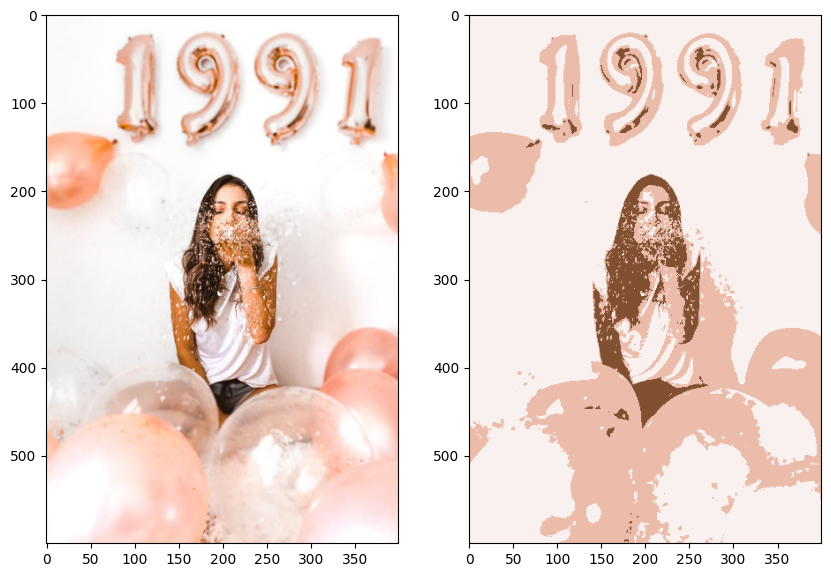

In [4]:
# Use 6 clusters in the K-means.
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X)
# Obtain the cluster centroids for each pixel in the image.
# These centroids are essentially our image segments.
X_kmeans = kmeans.cluster_centers_[kmeans.predict(X)]
X_kmeans = X_kmeans.astype("uint8")
# Convert the numpy array into an RGB image.
img_kmeans = X2image(X_kmeans, width, height, 3)
# Visualize the original image with the segmented one.
plt.figure(figsize = [10, 10])
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_kmeans)
plt.show()